## Question:  
Implement a stacking ensemble model using the ‘sklearn’ library in 
python. Your task is to use a base model consisting of a decision tree and a 
logistic regression model and then stack them using a logistic regression model 
as the final estimator. Train your ensemble model on a dataset of your choice 
(e.g., Iris or any suitable dataset) and evaluate its accuracy on a test set. 
Ensure to properly split the data into training and testing sets and report the 
accuracy of the model.

## What is Stacking?
Stacking is a ensemble learning technique where the final model known as the “stacked model" combines the predictions from multiple base models. The goal is to create a stronger model by using different models and combining them.

#### Architecture of Stacking  
Stacking architecture is like a team of models working together in two layers to improve prediction accuracy. Each layer has a specific job and the process is designed to make the final result more accurate than any single model alone. It has two parts:
##### 1) Base Models (Level-0)
These are the first models that directly learn from the original training data. You can think of them as the “helpers” that try to make predictions in their own way.
- Base models can be Decision Tree, Logistic Regression, Random Forest, etc.
- Each model is trained separately using the same training data

#### 2) Meta-Model (Level-1)  
This is the final model that learns from the output of the base models instead of the raw data. Its job is to combine the base models predictions in a smart way to make the final prediction.
- A simple Linear Regression or Logistic Regression can act as a meta-model.
- It looks at the outputs of the base models and finds patterns in how they make mistakes or agree.

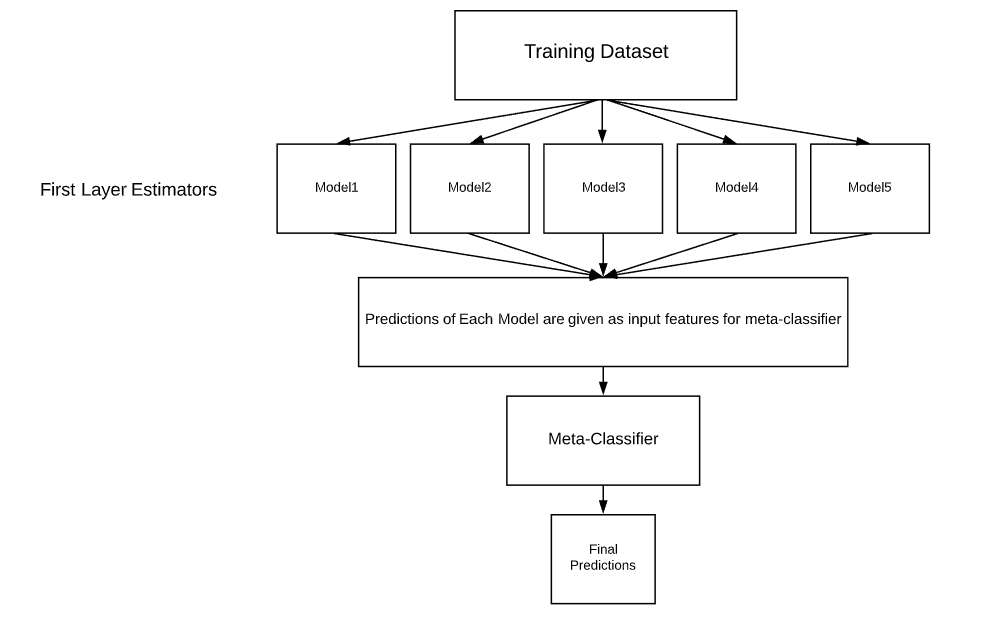

## Steps to implement stacking

- Import the libraries required  

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

- Load the dataset

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

- Split the data into training and testing sets.  
- We'll use 80% of the data for training and 20% for testing.  
- Using random_state ensures that the split is the same every time the code is run.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Test set size: 30 samples


- Define the base models

In [4]:
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42))
]

In [5]:
base_estimators

[('decision_tree', DecisionTreeClassifier(random_state=42)),
 ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42))]

- Define the final estimator (meta-model)

In [6]:
final_estimator = LogisticRegression()

- Create the Stacking Classifier

In [7]:
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5
)

- Train the stacking ensemble model on the training data

In [8]:
print("Training the stacking ensemble model...")
stacking_model.fit(X_train, y_train)
print("Training complete.")

Training the stacking ensemble model...
Training complete.


- Make predictions on the test set

In [9]:
y_pred = stacking_model.predict(X_test)

- Evaluate the model's accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)

- Report the accuracy

In [11]:
print(f"Stacking Ensemble Model Accuracy on Test Set: {accuracy:.4f}")

Stacking Ensemble Model Accuracy on Test Set: 0.9667


## Advantages of Stacking

- Better Performance: Stacking often results in higher accuracy by combining predictions from multiple models making the final output more reliable.
- Combines Different Models: It allow to use various types of models like decision trees, logistic regression, SVM made from each model’s unique strengths.
- Reduces Overfitting: When implemented with proper cross-validation it can reduce the risk of overfitting by balancing out the weaknesses of individual models.
- Learns from Mistakes: The meta-model is trained to recognize where base models go wrong and improves the final prediction by correcting those errors.
- Customizable: We can choose any combination of base and meta-models depending on our dataset and problem type making it highly flexible.

## Limitations of Stacking

- Complex to Implement: Compared to simple models or even bagging/boosting, stacking requires more steps and careful setup.
- Slow Training Time: Since you're training multiple models plus a meta-model it can be slow and computationally expensive.
- Hard to Interpret: With multiple layers of models it becomes difficult to explain how the final prediction was made.
- Risk of Overfitting: If the meta-model is too complex or if there's data leakage it can overfit the training data.
- Needs More Data: It performs better when you have enough data, especially for training both base and meta-models effectively